In [1]:
import pandas as pd
import numpy as np

print("Jupyter Notebook is ready!")


Jupyter Notebook is ready!


In [2]:
# Load student data
df = pd.read_csv('../data/students.csv')
df.head()  # Show first 5 rows


,Student ID,Name,Subject,Score
0,1001,Tom Carter,Mathematics,98
1,1002,Chris Walys,Science,65
2,1003,Bob Marker,English,75
3,1004,Carol Peris,Mathematics,40
4,1005,Natalie Peris,Science,30


In [3]:
# Show first 10 rows
df.head(10)

# Check for missing values
df.isnull().sum()


Student ID    0
Name          0
Subject       0
Score         0
dtype: int64

In [6]:
# Pivot table to see scores per subject
df_pivot = df.pivot(index='Student ID', columns='Subject', values='Score')

# Calculate average per student
df_pivot['Average'] = df_pivot.mean(axis=1)

# Show students with average > 80
top_students = df_pivot[df_pivot['Average'] > 80]
print(top_students)


Subject     Biology  Chemistry  English  IT  Mathematics  Networking  Physics  \
Student ID                                                                      
1001            NaN        NaN      NaN NaN         98.0         NaN      NaN   
1009            NaN        NaN      NaN NaN          NaN         NaN     89.0   
1010           92.0        NaN      NaN NaN          NaN         NaN      NaN   
1014            NaN        NaN      NaN NaN          NaN         NaN      NaN   
1017           92.0        NaN      NaN NaN          NaN         NaN      NaN   

Subject     Science  Statics  Web development  Average  
Student ID                                              
1001            NaN      NaN              NaN     98.0  
1009            NaN      NaN              NaN     89.0  
1010            NaN      NaN              NaN     92.0  
1014           98.0      NaN              NaN     98.0  
1017            NaN      NaN              NaN     92.0  


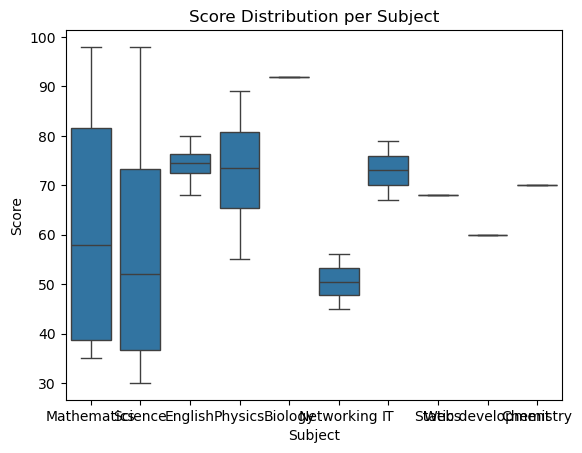

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.boxplot(x='Subject', y='Score', data=df)
plt.title("Score Distribution per Subject")
plt.show()


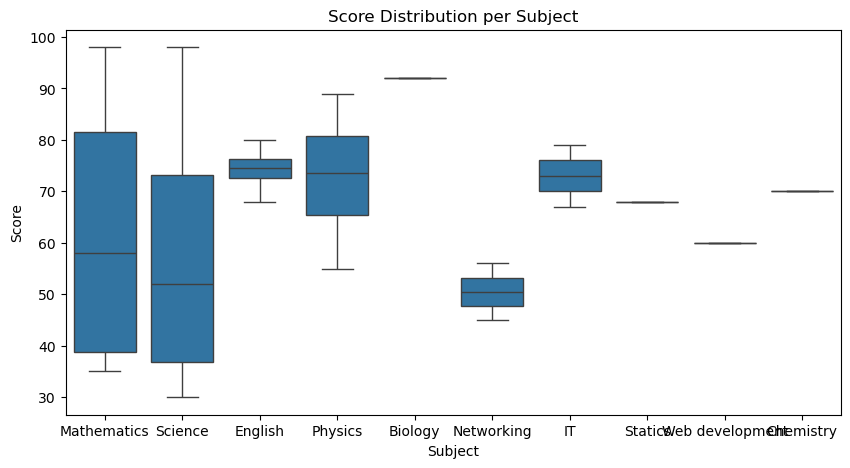

In [9]:
# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Set figure size for better readability
plt.figure(figsize=(10, 5))

# Create a boxplot showing score distribution per subject
sns.boxplot(x='Subject', y='Score', data=df)

# Add a title to the plot
plt.title("Score Distribution per Subject")

# Display the plot
plt.show()


In [10]:
import sqlite3

# Create in-memory SQLite database
conn = sqlite3.connect(':memory:')

# Load student data into the database
df.to_sql('students', conn, index=False, if_exists='replace')

# Example query: students scoring above 80
query = "SELECT * FROM students WHERE score > 80"
high_scorers = pd.read_sql_query(query, conn)

# Show results
high_scorers


,Student ID,Name,Subject,Score
0,1001,Tom Carter,Mathematics,98
1,1009,Noah Reed,Physics,89
2,1010,Mia Foster,Biology,92
3,1014,Sophia Hayes,Science,98
4,1017,Oliver Wood,Biology,92


In [12]:
from sklearn.linear_model import LinearRegression

# Example: Predict next subject score
# Prepare data (just as an example using average)
X = df_pivot[['Average']].values  # Features
y = df_pivot['Mathematics'].values       # Target subject

model = LinearRegression()
model.fit(X, y)

# Predict next score for a student with average = 85
predicted = model.predict([[85]])
print(f"Predicted Math score: {predicted[0]:.2f}")


ValueError: Input y contains NaN.

In [13]:

df_pivot.isnull().sum()


Subject
Biology            23
Chemistry          24
English            21
IT                 23
Mathematics        21
Networking         23
Physics            21
Science            21
Statics            24
Web development    24
Average             0
dtype: int64

In [14]:
from sklearn.linear_model import LinearRegression

# Features (average) and target (Mathematics)
X = df_clean[['Average']].values
y = df_clean['Mathematics'].values

# Train model
model = LinearRegression()
model.fit(X, y)

# Predict next score for a student with average = 85
predicted = model.predict([[85]])
print(f"Predicted Math score: {predicted[0]:.2f}")


NameError: name 'df_clean' is not defined

In [16]:
import pandas as pd
import numpy as np

# Pivot table: subjects as columns, students as rows
df_pivot = df.pivot(index='Student ID', columns='Subject', values='Score')

# Add Average column per student
df_pivot['Average'] = df_pivot.mean(axis=1)

# Show the pivot table
df_pivot.head()


Subject,Biology,Chemistry,English,IT,Mathematics,Networking,Physics,Science,Statics,Web development,Average
Student ID,,,,,,,,,,,
1001,NaN,NaN,NaN,NaN,98.0,NaN,NaN,NaN,NaN,NaN,98.0
1002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,65.0,NaN,NaN,65.0
1003,NaN,NaN,75.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,75.0
1004,NaN,NaN,NaN,NaN,40.0,NaN,NaN,NaN,NaN,NaN,40.0
1005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.0,NaN,NaN,30.0


In [17]:
# Fill missing values with the mean of each subject
df_clean = df_pivot.fillna(df_pivot.mean())

# Check the cleaned data
df_clean.head()


Subject,Biology,Chemistry,English,IT,Mathematics,Networking,Physics,Science,Statics,Web development,Average
Student ID,,,,,,,,,,,
1001,92.0,70.0,74.25,73.0,98.00,50.5,72.75,58.0,68.0,60.0,98.0
1002,92.0,70.0,74.25,73.0,62.25,50.5,72.75,65.0,68.0,60.0,65.0
1003,92.0,70.0,75.00,73.0,62.25,50.5,72.75,58.0,68.0,60.0,75.0
1004,92.0,70.0,74.25,73.0,40.00,50.5,72.75,58.0,68.0,60.0,40.0
1005,92.0,70.0,74.25,73.0,62.25,50.5,72.75,30.0,68.0,60.0,30.0


In [18]:
# Fill missing values with the mean of each subject
df_clean = df_pivot.fillna(df_pivot.mean())

# Check the cleaned data
df_clean.head()


Subject,Biology,Chemistry,English,IT,Mathematics,Networking,Physics,Science,Statics,Web development,Average
Student ID,,,,,,,,,,,
1001,92.0,70.0,74.25,73.0,98.00,50.5,72.75,58.0,68.0,60.0,98.0
1002,92.0,70.0,74.25,73.0,62.25,50.5,72.75,65.0,68.0,60.0,65.0
1003,92.0,70.0,75.00,73.0,62.25,50.5,72.75,58.0,68.0,60.0,75.0
1004,92.0,70.0,74.25,73.0,40.00,50.5,72.75,58.0,68.0,60.0,40.0
1005,92.0,70.0,74.25,73.0,62.25,50.5,72.75,30.0,68.0,60.0,30.0


In [19]:
from sklearn.linear_model import LinearRegression

# Feature: Average column
X = df_clean[['Average']].values

# Target: Mathematics scores
y = df_clean['Mathematics'].values

# Train the model
model = LinearRegression()
model.fit(X, y)

# Predict score for a student with Average = 85
predicted = model.predict([[85]])
print(f"Predicted Mathematics score: {predicted[0]:.2f}")


Predicted Mathematics score: 67.39


In [20]:
# Students with average > 80
top_students = df_clean[df_clean['Average'] > 80]
top_students


Subject,Biology,Chemistry,English,IT,Mathematics,Networking,Physics,Science,Statics,Web development,Average
Student ID,,,,,,,,,,,
1001,92.0,70.0,74.25,73.0,98.00,50.5,72.75,58.0,68.0,60.0,98.0
1009,92.0,70.0,74.25,73.0,62.25,50.5,89.00,58.0,68.0,60.0,89.0
1010,92.0,70.0,74.25,73.0,62.25,50.5,72.75,58.0,68.0,60.0,92.0
1014,92.0,70.0,74.25,73.0,62.25,50.5,72.75,98.0,68.0,60.0,98.0
1017,92.0,70.0,74.25,73.0,62.25,50.5,72.75,58.0,68.0,60.0,92.0


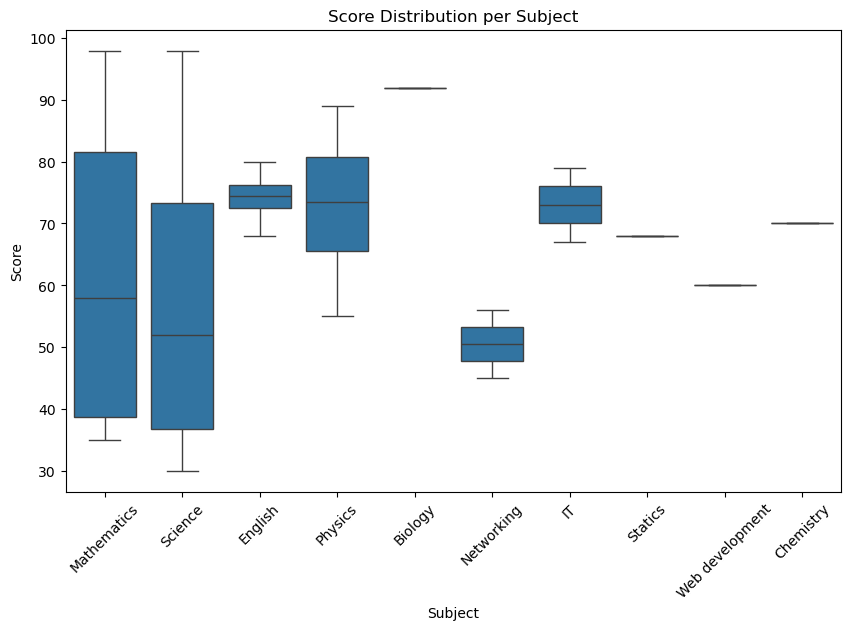

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.boxplot(x='Subject', y='Score', data=df)
plt.title("Score Distribution per Subject")
plt.xticks(rotation=45)
plt.show()


In [22]:
import sqlite3

# Create temporary database
conn = sqlite3.connect(':memory:')
df.to_sql('students', conn, index=False, if_exists='replace')

# Query: students scoring above 80
query = "SELECT * FROM students WHERE Score > 80"
high_scorers = pd.read_sql_query(query, conn)
high_scorers


,Student ID,Name,Subject,Score
0,1001,Tom Carter,Mathematics,98
1,1009,Noah Reed,Physics,89
2,1010,Mia Foster,Biology,92
3,1014,Sophia Hayes,Science,98
4,1017,Oliver Wood,Biology,92
